In [1]:
'''!pip install tensorflow --upgrade
!pip install tensorflow-probability --upgrade
!pip install tf-keras --upgrade
!pip install scikit-image --upgrade
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents
!pip install pyglet
!pip install pandas pandas-ta numpy'''

"!pip install tensorflow --upgrade\n!pip install tensorflow-probability --upgrade\n!pip install tf-keras --upgrade\n!pip install scikit-image --upgrade\n!pip install 'imageio==2.4.0'\n!pip install pyvirtualdisplay\n!pip install tf-agents\n!pip install pyglet\n!pip install pandas pandas-ta numpy"

In [1]:
import os
# Keep using keras-2 (tf-keras) rather than keras-3 (keras).
os.environ['TF_USE_LEGACY_KERAS'] = '1'

from envs.moving_average_env import MovingAverageEnv
from envs.rsi_env import RsiEnv
from envs.macd_env import MacdEnv
from envs.adx_env import AdxEnv
from envs.combined_env import CombinedEnv
from utils import load_dataset

from tf_agents.environments import tf_py_environment
from tf_agents.policies import random_tf_policy
import matplotlib.pyplot as plt

In [2]:
df = load_dataset('./resources/AMZN.csv')
#env = MovingAverageEnv(df=df, window_size=10, frame_bound=(2000, 2300))
#env = RsiEnv(df=df, window_size=10, frame_bound=(2000, 2300))
#env = MacdEnv(df=df, window_size=10, frame_bound=(2000, 2500))
#env = AdxEnv(df=df, window_size=10, frame_bound=(2000, 2300))
env = CombinedEnv(df=df, window_size=10, frame_bound=(2000, 2500))

In [3]:
df.iloc[0:5]

,Close,Volume,Open,High,Low
0,14.2410,48396380,14.3275,14.4165,14.2250
1,14.2785,49548580,14.2595,14.4780,14.1740
2,14.3545,31705200,14.2940,14.4758,14.2870
3,14.2285,36301420,14.2545,14.4250,14.1915
4,14.4865,28451720,14.2400,14.4935,14.2400


In [4]:
env.time_step_spec()

TimeStep(
{'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type'),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(100,), dtype=dtype('float32'), name='observation', minimum=[-5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.
 -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.], maximum=[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5

In [5]:
env.prices[0:5]

array([184.084 , 181.56  , 178.6815, 177.4795, 178.6595], dtype=float32)

In [8]:
env.signal_features[0:5]

array([[ 1.5420618 ,  1.309839  ,  1.1230004 ,  1.7300786 ,  0.31337246,
         0.858509  , -0.85189825,  1.8200309 ,  0.38256782,  1.5755248 ],
       [ 1.5542157 ,  1.3235759 ,  1.1335999 ,  1.1059327 ,  0.21301319,
         0.5463291 , -0.4803351 ,  1.7126075 ,  0.24772789,  1.6029414 ],
       [ 1.555847  ,  1.3328297 ,  1.1418865 ,  0.49843124,  0.00420618,
         0.25553024,  0.00282696,  1.531729  ,  0.08109184,  1.5886989 ],
       [ 1.5534122 ,  1.3400735 ,  1.1491308 ,  0.2683197 , -0.12616844,
        -0.00756143,  0.7357634 ,  1.3412396 , -0.05990573,  1.539207  ],
       [ 1.5550485 ,  1.3486501 ,  1.1570938 ,  0.46913978, -0.3314059 ,
         0.3221487 ,  0.4393281 ,  1.2105755 , -0.12484351,  1.4734807 ]],
      dtype=float32)

In [9]:
assert len(env.prices) == len(env.signal_features)

In [10]:
for feature in env.signal_features[0:1]:
    print(feature)

[ 1.5420618   1.309839    1.1230004   1.7300786   0.31337246  0.858509
 -0.85189825  1.8200309   0.38256782  1.5755248 ]


In [11]:
eval_env = tf_py_environment.TFPyEnvironment(env)

In [12]:
random_policy = random_tf_policy.RandomTFPolicy(eval_env.time_step_spec(),
                                                eval_env.action_spec())

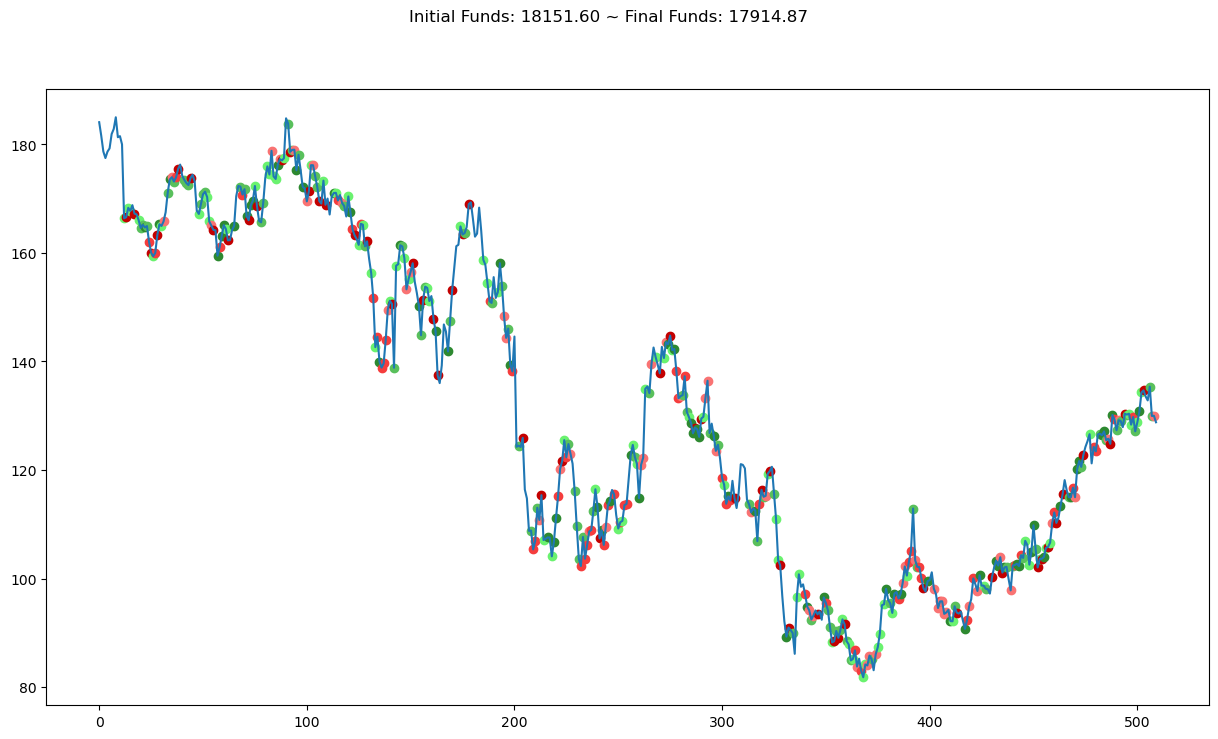

In [13]:
def render_policy_eval2(policy, filename):
    time_step = eval_env.reset()
    while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        #print(time_step.observation)
    env.render('human')
    env.save_render('luqui_test')

def render_policy_eval(policy, filename):
    time_step = eval_env.reset()
    while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
    plt.figure(figsize=(15, 8))
    env.save_render(filename)
    
render_policy_eval(random_policy, './evals/test_env.jpg')